# Time-Lapse Movie
This notebook shows how to make a time-lapse animation from a set of CamHD videos. This notebook relies on the scene log compiled by Friedrich Knuth and Hailey Conrad.

#### Setup your environment

In [1]:
%matplotlib inline
import pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt

#### Ingest the Rutgers scene log into a nested list

In [2]:
import requests
import csv
scene_log_url = 'https://raw.githubusercontent.com/ooi-data-review/camhd_metadata/master/scene_timing/zoom0_scenes.csv'
scene_log_page = requests.get(scene_log_url)
scene_log_content = scene_log_page.content.decode('utf-8')
scene_log_csv = csv.reader(scene_log_content.splitlines(), delimiter=',')
scene_log = list(scene_log_csv)

#### Get a list of local CamHD files to process

In [47]:
import re

## Get list of CamHD files
cache_root = 'https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/'

def process_dir( url ):
    #print("Processing directory: ", url)
    r = requests.get( url )
    j = r.json()
    
    out = []
    for d in j['Directories']:
        out += process_dir( url + d )
    
    for f in j['Files']:
        out += process_file( url + '/' + f )

    return out

def process_file( url ):
    print(url)
    if re.search('mov$', url ):
#         r = requests.get( url )
#         j = r.json()
        
        return [url]
        
    return []

paths = [ '2015/11/',
          '2015/12/']

file_urls = []
for p in paths:
    file_urls += process_dir( cache_root + p )
 
print(file_urls)
    

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/04/CAMHDA301-20151104T000020Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/04/CAMHDA301-20151104T000020Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/04/CAMHDA301-20151104T030020Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/04/CAMHDA301-20151104T030020Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/04/CAMHDA301-20151104T060020Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/04/CAMHDA301-20151104T060020Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/04/CAMHDA301-20151104T0900

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/23/CAMHDA301-20151123T000000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/23/CAMHDA301-20151123T000000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/23/CAMHDA301-20151123T030000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/23/CAMHDA301-20151123T030000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/23/CAMHDA301-20151123T060000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/23/CAMHDA301-20151123T060000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/23/CAMHDA301-20151123T0900

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/01/CAMHDA301-20151201T210000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/01/CAMHDA301-20151201T210000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/02/CAMHDA301-20151202T000000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/02/CAMHDA301-20151202T000000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/02/CAMHDA301-20151202T030000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/02/CAMHDA301-20151202T030000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/02/CAMHDA301-20151202T0600

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/13/CAMHDA301-20151213T120000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/13/CAMHDA301-20151213T120000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/13/CAMHDA301-20151213T150000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/13/CAMHDA301-20151213T150000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/13/CAMHDA301-20151213T180000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/13/CAMHDA301-20151213T180000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/13/CAMHDA301-20151213T2100

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/18/CAMHDA301-20151218T000000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/18/CAMHDA301-20151218T000000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/18/CAMHDA301-20151218T030000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/18/CAMHDA301-20151218T030000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/18/CAMHDA301-20151218T060000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/18/CAMHDA301-20151218T060000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/18/CAMHDA301-20151218T0900

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/22/CAMHDA301-20151222T000000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/22/CAMHDA301-20151222T000000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/22/CAMHDA301-20151222T030000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/22/CAMHDA301-20151222T030000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/22/CAMHDA301-20151222T060000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/22/CAMHDA301-20151222T060000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/22/CAMHDA301-20151222T0900

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/26/CAMHDA301-20151226T000000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/26/CAMHDA301-20151226T000000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/26/CAMHDA301-20151226T030000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/26/CAMHDA301-20151226T030000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/26/CAMHDA301-20151226T060000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/26/CAMHDA301-20151226T060000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/26/CAMHDA301-20151226T0900

https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/30/CAMHDA301-20151230T000000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/30/CAMHDA301-20151230T000000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/30/CAMHDA301-20151230T030000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/30/CAMHDA301-20151230T030000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/30/CAMHDA301-20151230T060000Z.mov
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/30/CAMHDA301-20151230T060000Z.mp4
https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/12/30/CAMHDA301-20151230T0900

#### Get a list of frame numbers to process using the log file

In [48]:
import os

good_movies = []
frame_numbers = []
for url in file_urls:
    foo,mov_file = os.path.split( url )
    print(mov_file)
    
    for row in scene_log:
         if re.match( row[0], mov_file ):
            
            next_frame_time = row[3].split(':') # this is the third scene
            
            if len(next_frame_time)==3:
                frame_time = next_frame_time
                
                good_movies.append( url )
                frame_numbers.append(int(round((int(frame_time[1])*60+int(frame_time[2]))*29.95))+60)
                
print( "Found %d good movies" % len(good_movies) )

CAMHDA301-20151104T000020Z.mov
CAMHDA301-20151104T030020Z.mov
CAMHDA301-20151104T060020Z.mov
CAMHDA301-20151104T090020Z.mov
CAMHDA301-20151104T120020Z.mov
CAMHDA301-20151104T150020Z.mov
CAMHDA301-20151104T180020Z.mov
CAMHDA301-20151104T210020Z.mov
CAMHDA301-20151111T000020Z.mov
CAMHDA301-20151111T030020Z.mov
CAMHDA301-20151111T060020Z.mov
CAMHDA301-20151111T090020Z.mov
CAMHDA301-20151111T120020Z.mov
CAMHDA301-20151111T150020Z.mov
CAMHDA301-20151111T180021Z.mov
CAMHDA301-20151111T210020Z.mov
CAMHDA301-20151118T000020Z.mov
CAMHDA301-20151118T030020Z.mov
CAMHDA301-20151118T060020Z.mov
CAMHDA301-20151118T090020Z.mov
CAMHDA301-20151118T120020Z.mov
CAMHDA301-20151118T150020Z.mov
CAMHDA301-20151118T150020Z_01.mov
CAMHDA301-20151118T180020Z.mov
CAMHDA301-20151119T210000Z.mov
CAMHDA301-20151120T000000Z.mov
CAMHDA301-20151120T090000Z.mov
CAMHDA301-20151120T180000Z.mov
CAMHDA301-20151120T210000Z.mov
CAMHDA301-20151121T000000Z.mov
CAMHDA301-20151121T150000Z.mov
CAMHDA301-20151121T180000Z.mov
CAMHD

CAMHDA301-20151229T120000Z.mov
CAMHDA301-20151229T150000Z.mov
CAMHDA301-20151229T180000Z.mov
CAMHDA301-20151229T210000Z.mov
CAMHDA301-20151230T000000Z.mov
CAMHDA301-20151230T030000Z.mov
CAMHDA301-20151230T060000Z.mov
CAMHDA301-20151230T090000Z.mov
CAMHDA301-20151230T120000Z.mov
CAMHDA301-20151230T150000Z.mov
CAMHDA301-20151230T180000Z.mov
CAMHDA301-20151230T210000Z.mov
CAMHDA301-20151231T000000Z.mov
CAMHDA301-20151231T030000Z.mov
CAMHDA301-20151231T060000Z.mov
CAMHDA301-20151231T090000Z.mov
CAMHDA301-20151231T120000Z.mov
CAMHDA301-20151231T150000Z.mov
CAMHDA301-20151231T180000Z.mov
CAMHDA301-20151231T210000Z.mov
Found 258 good movies


#### Show the first image of the time-lapse and save it for the cover image

In [49]:
import requests
from PIL import Image
from io import BytesIO

def get_frame( url, frame ):
    r = requests.get( (url + "/frame/%d") % frame )
    return Image.open( BytesIO( r.content ) )

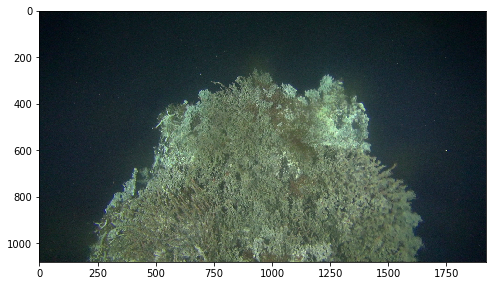

In [50]:
plt.rc('figure', figsize=(8, 8))

frame = get_frame(good_movies[0], frame_numbers[0] )
imgplot = plt.imshow(frame)

In [51]:
from scipy.misc import imresize
resized = imresize(frame, (270, 480))
Image.fromarray(resized).save('time_lapse.png')

#### Loop through the file list to generate an MP4 using an FFMPEG pipe

In [ ]:
%%time
import subprocess as sp
command = [ 'ffmpeg',
           '-y', #overwrite output file if it exists
           '-f', 'rawvideo',
           '-vcodec','rawvideo',
           '-s', '1920x1080', # size of input frame
           '-pix_fmt', 'rgb24',
           '-r', '30', # output frame rate
           '-i', '-', # input from pipe
           '-an', # no audio
           '-vf', 'scale=480x270',
           '-c:v', 'h264',
           '-preset', 'veryfast',
           '-crf', '18',
           '-pix_fmt', 'yuv420p',
           'time_lapse_big.mp4' ]

pipe = sp.Popen(command, stdin=sp.PIPE, stderr=sp.PIPE)

for i, filename in enumerate(good_movies):
    print( i, filename )
    frame = get_frame(filename, frame_numbers[i])
    pipe.stdin.write(frame.tobytes())

pipe.stdin.flush() # Ensure nothing is left in the buffer
pipe.terminate()

0 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/20/CAMHDA301-20151120T000000Z.mov
1 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/20/CAMHDA301-20151120T210000Z.mov
2 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/21/CAMHDA301-20151121T000000Z.mov
3 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/21/CAMHDA301-20151121T150000Z.mov
4 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/21/CAMHDA301-20151121T180000Z.mov
5 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/21/CAMHDA301-20151121T210000Z.mov
6 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/22/CAMHDA301

57 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/28/CAMHDA301-20151128T090000Z.mov
58 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/28/CAMHDA301-20151128T120000Z.mov
59 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/28/CAMHDA301-20151128T150000Z.mov
60 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/28/CAMHDA301-20151128T180000Z.mov
61 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/28/CAMHDA301-20151128T210000Z.mov
62 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/29/CAMHDA301-20151129T000000Z.mov
63 https://camhd-app-dev.appspot.com/v1/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2015/11/29/CA

#### Show the video using HTML5 magic

In [42]:
%%HTML
<video width="480" height="270" controls poster="test.png">
  <source src="time_lapse.mp4" type="video/mp4">
</video>

### References

PyCamHD: https://github.com/tjcrone/pycamhd<br>
CamHDHub: https://github.com/tjcrone/camhdhub<br>
Raw Data Archive: https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/<br>
CamHD Metadata: https://github.com/ooi-data-review/camhd_metadata